In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_72695/781345070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
usd_df = pd.read_excel('RAW/OECD_US.xlsx')
china_df = pd.read_excel('RAW/OECD_CN.xlsx')
eu_df = pd.read_excel('RAW/OECD_euro.xlsx')


In [3]:
china_df.head(5)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Frequency of observation,REF_AREA,Reference area,SECTOR,Institutional sector,...,CONF_STATUS,Confidentiality status,DECIMALS,Decimals,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,CURRENCY,Currency
0,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,Annual GDP and components - expenditure approach,I,A,Annual,CHN,China (People’s Republic of),S1,Total economy,...,F,Free (free for publication),1,One,A,Normal value,6,Millions,_Z,Not applicable
1,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,Annual GDP and components - expenditure approach,I,A,Annual,CHN,China (People’s Republic of),S1,Total economy,...,F,Free (free for publication),1,One,A,Normal value,6,Millions,_Z,Not applicable
2,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,Annual GDP and components - expenditure approach,I,A,Annual,CHN,China (People’s Republic of),S1,Total economy,...,F,Free (free for publication),1,One,A,Normal value,6,Millions,_Z,Not applicable
3,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,Annual GDP and components - expenditure approach,I,A,Annual,CHN,China (People’s Republic of),S1,Total economy,...,F,Free (free for publication),1,One,A,Normal value,6,Millions,_Z,Not applicable
4,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,Annual GDP and components - expenditure approach,I,A,Annual,CHN,China (People’s Republic of),S1,Total economy,...,F,Free (free for publication),1,One,A,Normal value,6,Millions,_Z,Not applicable


In [4]:
usd_df.head(3)
columns_keep = ['REF_AREA','Reference area','OBS_VALUE','TIME_PERIOD','UNIT_MULT','PRICE_BASE']
usd_df_filtered = usd_df[columns_keep]
china_df_filtered = china_df[columns_keep]
eu_df_filtered = eu_df[columns_keep]
merged_df = pd.concat([usd_df_filtered, china_df_filtered, eu_df_filtered])
merged_df['Reference area'] = merged_df['Reference area'].str.replace('European Union (27 countries from 01/02/2020)','European Union')  #27 countries from 1/02/2020
merged_df['REF_AREA'] = merged_df['REF_AREA'].str.replace('EU27_2020','EU-27')

In [5]:
merged_df['OBS_VALUE']= merged_df['OBS_VALUE']/1000000

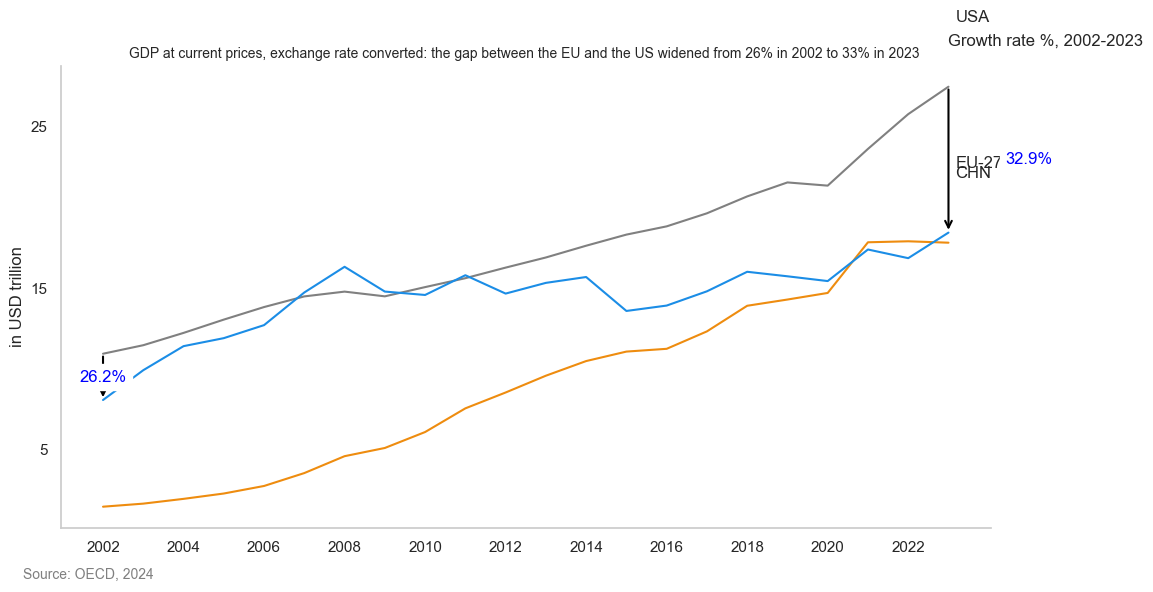

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

merged_df['Smoothed_Value'] = merged_df.groupby(['REF_AREA','TIME_PERIOD'])['OBS_VALUE'].transform(lambda x: x.rolling(window=1, min_periods=1).mean())
custom_palette = ['#808080', '#ee8c0f', '#1b8de6']
plt.xticks(range(2002, 2023, 2)) 
plt.yticks(range(5, 26, 10))
           
plt.grid(False)
plt.title("GDP at current prices, exchange rate converted: the gap between the EU and the US widened from 26% in 2002 to 33% in 2023 ", fontsize=10)
ax = sns.lineplot(merged_df, x='TIME_PERIOD', y='Smoothed_Value', hue='REF_AREA', palette=custom_palette, legend = False)
sns.despine()
# Automatically place category labels at the end of each line
for line, label in zip(ax.get_lines(), merged_df['REF_AREA'].unique()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    ax.annotate(label, xy=(x, y), xytext=(5, 50), textcoords="offset points", va="center")


y_2002_USA = merged_df[(merged_df['TIME_PERIOD'] == 2002) & (merged_df['REF_AREA'] == 'USA')]['Smoothed_Value'].values[0]
y_2002_EU = merged_df[(merged_df['TIME_PERIOD'] == 2002) & (merged_df['REF_AREA'] == 'EU-27')]['Smoothed_Value'].values[0]
y_2023_USA = merged_df[(merged_df['TIME_PERIOD'] == 2023) & (merged_df['REF_AREA'] == 'USA')]['Smoothed_Value'].values[0]
y_2023_EU = merged_df[(merged_df['TIME_PERIOD'] == 2023) & (merged_df['REF_AREA'] == 'EU-27')]['Smoothed_Value'].values[0]
y_2002_CN = merged_df[(merged_df['TIME_PERIOD'] == 2002) & (merged_df['REF_AREA'] == 'CHN')]['Smoothed_Value'].values[0]
y_2023_CN = merged_df[(merged_df['TIME_PERIOD'] == 2023) & (merged_df['REF_AREA'] == 'CHN')]['Smoothed_Value'].values[0]

ax.annotate('', xy=(2002, y_2002_USA), xytext=(2002, y_2002_EU),
            arrowprops=dict(arrowstyle='<-', color='black', lw=1.5))

ax.text(2002, (y_2002_USA  + y_2002_EU) / 2, f'{abs(round(((y_2002_EU - y_2002_USA ) / y_2002_USA )*100,1))}%', color='blue',
        ha='center', va='center', backgroundcolor='white')

ax.annotate('', xy=(2023, y_2023_USA), xytext=(2023, y_2023_EU),
            arrowprops=dict(arrowstyle='<-', color='black', lw=1.5))

ax.text(2025, (y_2023_USA + y_2023_EU) / 2, f'{abs(round(((y_2023_EU - y_2023_USA) / y_2023_USA)*100,1))}%', color='blue',
        ha='center', va='center', backgroundcolor='white')

ax.text(2023, 30, 'Growth rate %, 2002-2023')
ax.text(2000, -3, 'Source: OECD, 2024', fontsize=10, color='grey', ha='left')

plt.xlabel("")
plt.ylabel("in USD trillion")
plt.show()

In [7]:
merged_df_point = merged_df[(merged_df['TIME_PERIOD'].isin([2002, 2023])) & 
                            (merged_df['REF_AREA'].isin(['USA', 'EU-27', 'CHN']))]

merged_df_point

,REF_AREA,Reference area,OBS_VALUE,TIME_PERIOD,UNIT_MULT,PRICE_BASE,Smoothed_Value
4,USA,United States,10.929108,2002,6,V,10.929108
12,USA,United States,27.440600,2023,6,V,27.440600
4,CHN,China (People’s Republic of),1.470557,2002,6,V,1.470557
19,CHN,China (People’s Republic of),17.794782,2023,6,V,17.794782
4,EU-27,European Union,8.067820,2002,6,V,8.067820
19,EU-27,European Union,18.418535,2023,6,V,18.418535


/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_72695/1916488971.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/var/folders/dx/505c01650qnflnz6sd29qqsh0000gn/T/ipykernel_72695/1916488971.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


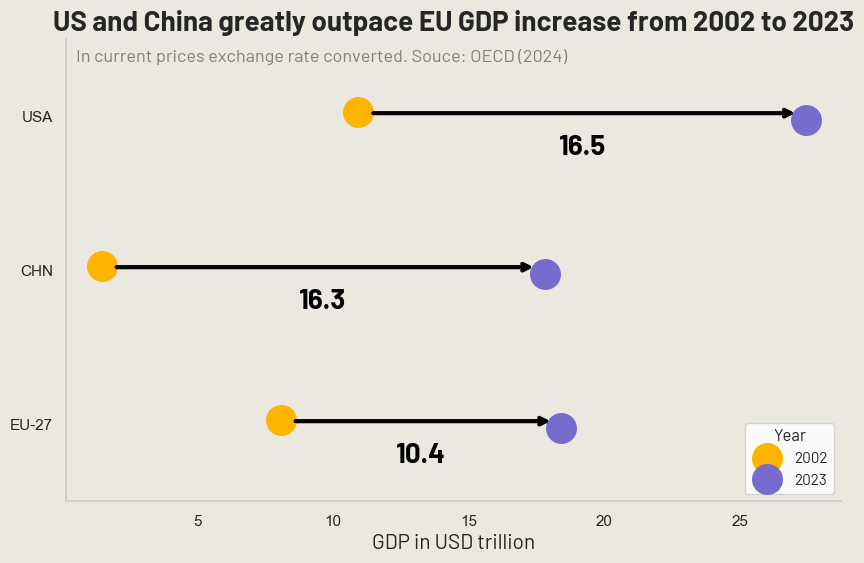

In [108]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(
    data=merged_df_point, x='OBS_VALUE', y='REF_AREA', hue='TIME_PERIOD',
    palette=['#ffb400', '#776bcd'],  
    scale=3, markers=["o", "o"], dodge=True, join=False, ax=ax
)

for country in merged_df_point['REF_AREA'].unique():
    data_2002 = merged_df_point[(merged_df_point['REF_AREA'] == country) & (merged_df_point['TIME_PERIOD'] == 2002)]
    data_2023 = merged_df_point[(merged_df_point['REF_AREA'] == country) & (merged_df_point['TIME_PERIOD'] == 2023)]
    
    if not data_2002.empty and not data_2023.empty:
        x_start = data_2002['OBS_VALUE'].values[0]
        y_start = data_2002['REF_AREA'].values[0]
        x_end = data_2023['OBS_VALUE'].values[0]
        y_end = data_2023['REF_AREA'].values[0]
        y_pos = list(merged_df_point['REF_AREA'].unique()).index(country)
        x_start_adj = x_start +0.45  # Shift start point slightly to the left
        x_end_adj = x_end-0.3     # Shift end point slightly to the right
        y_pos_adj = y_pos - 0.02     # Shift vertically by a small amount

        # Draw the arrow
        ax.annotate('', xy=(x_end_adj, y_pos_adj), xytext=(x_start_adj, y_pos_adj),
                    arrowprops=dict(arrowstyle='->', color='black', lw=3))
        
        difference = x_end - x_start
        ax.text((x_start + x_end) / 2, y_pos + 0.2, f"{difference:.1f}", 
                color='black', va='center', ha='center', font = 'Barlow', fontsize=20, fontweight='bold')
    
sns.despine()
plt.rcParams['font.family'] = 'Barlow'
plt.grid(False)
fig.subplots_adjust(top=0.88)
ax.set_facecolor((1, 1, 1, 0))
fig.patch.set_facecolor('#eae7ddf0')
ax.set_title("US and China greatly outpace EU GDP increase from 2002 to 2023",font= 'Barlow', fontsize=20, weight='bold')
fig.text(0.38, 0.85, "In current prices exchange rate converted. Souce: OECD (2024)", 
         ha='center', va='center', fontsize=13, color='grey')
ax.set_xlabel("GDP in USD trillion",font= 'Barlow', fontsize=15)
ax.set_ylabel("")
plt.legend(title="Year", loc='lower right')
plt.show()

